# Lab | Sequence Modeling with LSTM

In [51]:
import json
import tensorflow as tf
import csv
import random
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers


embedding_dim = 100
max_length = 16
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size=160000#Your dataset size here. Experiment using smaller values (i.e. 16000), but don't forget to train on at least 160000 to see the best effects
test_portion=.1




In [52]:
num_sentences = 0
corpus = []

with open("training.1600000.processed.noemoticon.csv", encoding='ISO-8859-1') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
      # Your Code here. Create list items where the first item is the text, found in row[5], and the second is the label. Note that the label is a '0' or a '4' in the text. When it's the former, make
      # your label to be 0, otherwise 1. Keep a count of the number of sentences in num_sentences
        list_item=[]
        # YOUR CODE HERE
        this_text = row[5] 
        this_label = 0 if row[0] == '0' else 1
        list_item.append(this_text)
        list_item.append(this_label)
        num_sentences = num_sentences + 1
        corpus.append(list_item)


In [53]:
print(num_sentences)
print(len(corpus))
print(corpus[1])

# Expected Output:
# 1600000
# 1600000
# ["is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!", 0]

1600000
1600000
["is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!", 0]


In [54]:
sentences=[]
labels=[]
random.shuffle(corpus)
for x in range(training_size):
    sentences.append(corpus[x][0])
    labels.append(corpus[x][1])


tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
vocab_size=len(word_index)

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding=padding_type, maxlen=max_length)

split = int(test_portion * training_size)

test_sequences = padded[:split]
training_sequences = padded[split:]
test_labels = np.array(labels[:split])
training_labels = np.array(labels[split:])

In [55]:
print(vocab_size)
print(word_index['i'])
# Expected Output
# 138858
# 1

138649
1


In [56]:

embeddings_index = {};
with open('glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

embeddings_matrix = np.zeros((vocab_size+1, embedding_dim));
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

In [57]:
print(len(embeddings_matrix))
# Expected Output
# 138859

138650


In [58]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False),
    # YOUR CODE HERE - experiment with combining different types, such as convolutions and LSTMs
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')

])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

num_epochs = 50
history = model.fit(training_sequences, training_labels, epochs=num_epochs, validation_data=(test_sequences, test_labels), verbose=2)

print("Training Complete")


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │    13,865,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,865,000 (52.89 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 13,865,000 (52.89 MB)

Epoch 1/50
4500/4500 - 23s - 5ms/step - accuracy: 0.7321 - loss: 0.5294 - val_accuracy: 0.7500 - val_loss: 0.5023
Epoch 2/50
4500/4500 - 20s - 4ms/step - accuracy: 0.7695 - loss: 0.4794 - val_accuracy: 0.7714 - val_loss: 0.4736
Epoch 3/50
4500/4500 - 19s - 4ms/step - accuracy: 0.7830 - loss: 0.4575 - val_accuracy: 0.7725 - val_loss: 0.4746
Epoch 4/50
4500/4500 - 32s - 7ms/step - accuracy: 0.7936 - loss: 0.4415 - val_accuracy: 0.7788 - val_loss: 0.4653
Epoch 5/50
4500/4500 - 23s - 5ms/step - accuracy: 0.8016 - loss: 0.4274 - val_accuracy: 0.7787 - val_loss: 0.4760
Epoch 6/50
4500/4500 - 25s - 6ms/step - accuracy: 0.8089 - loss: 0.4155 - val_accuracy: 0.7801 - val_loss: 0.4678
Epoch 7/50
4500/4500 - 27s - 6ms/step - accuracy: 0.8143 - loss: 0.4044 - val_accuracy: 0.7828 - val_loss: 0.4695
Epoch 8/50
4500/4500 - 22s - 5ms/step - accuracy: 0.8199 - loss: 0.3936 - val_accuracy: 0.7796 - val_loss: 0.4714
Epoch 9/50
4500/4500 - 23s - 5ms/step - accuracy: 0.8253 - loss: 0.3839 - val_accuracy: 

<Figure size 640x480 with 0 Axes>

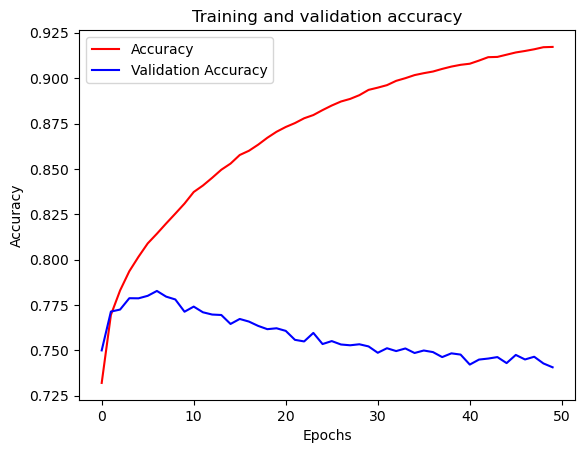

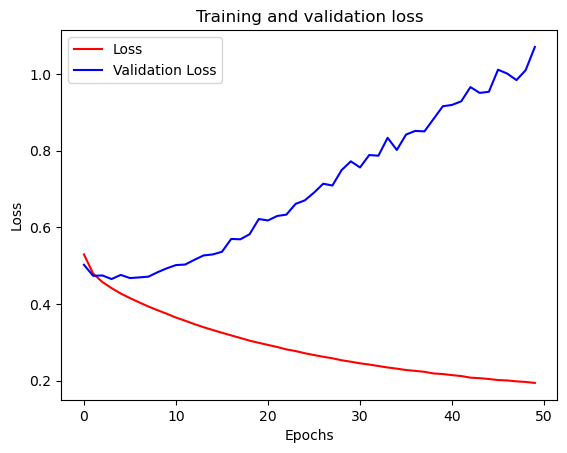

<Figure size 640x480 with 0 Axes>

In [59]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()


# Expected Output
# A chart where the validation loss does not increase sharply!